### Define Data Quality KPIs

**Task 1**: Identify Relevant KPIs

**Objective**: Develop KPIs that align with organizational goals.

**Steps**:
1. Choose a dataset from a domain of your interest (e.g., sales data, healthcare records, or transaction logs).
2. Identify three KPIs that would be crucial for assessing the data quality in your chosen dataset. Consider accuracy, completeness, and timeliness.
3. Document why each KPI is important for maintaining high-quality data in your given context.

In [2]:
import pandas as pd

# Load your data into a Pandas DataFrame
try:
    sales_data = pd.read_csv('sales.csv')
except FileNotFoundError:
    print("Error: 'sales.csv' not found. Please make sure the file is in the correct directory or provide the correct path.")
    sales_data = None  # Assign None if the file isn't found

if sales_data is not None:
    # Assuming your DataFrame has columns like:
    # 'order_id', 'product_id', 'shipping_address', 'order_date', 'shipment_date'

    # 1. Percentage of Orders with Valid Product IDs
    # Let's assume you have a list or set of valid product IDs
    valid_product_ids = {'PROD123', 'PROD456', 'PROD789'}  # Replace with your actual valid IDs
    valid_product_id_count = sales_data['product_id'].isin(valid_product_ids).sum()
    total_orders = len(sales_data)
    percentage_valid_product_ids = (valid_product_id_count / total_orders) * 100
    print(f"Percentage of Orders with Valid Product IDs: {percentage_valid_product_ids:.2f}%")

    # 2. Percentage of Orders with Complete Shipping Information
    # Define what you consider 'complete' (e.g., non-null address fields)
    complete_shipping_count = sales_data['shipping_address'].notna().sum()
    percentage_complete_shipping = (complete_shipping_count / total_orders) * 100
    print(f"Percentage of Orders with Complete Shipping Information: {percentage_complete_shipping:.2f}%")

    # 3. Average Time Lag Between Order Placement and Shipment
    # Make sure your date columns are in datetime format
    sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
    sales_data['shipment_date'] = pd.to_datetime(sales_data['shipment_date'])
    # Calculate the time difference in days
    sales_data['time_lag'] = (sales_data['shipment_date'] - sales_data['order_date']).dt.days
    average_time_lag = sales_data['time_lag'].mean()
    print(f"Average Time Lag Between Order Placement and Shipment: {average_time_lag:.2f} days")
else:
    print("Data loading failed. Please check the file path.")

Error: 'sales.csv' not found. Please make sure the file is in the correct directory or provide the correct path.
Data loading failed. Please check the file path.


**Task 2**: Develop a KPI Dashboard

**Objective**: Visualize your KPIs for better monitoring.

**Steps**:
1. Use a tool like Excel or a BI tool (e.g., Tableau, Power BI) to create a simple dashboard.
2. Input sample data and visualize your chosen KPIs, showing how they would be monitored.
3. Share your dashboard with peers and gather feedback on KPI relevance and clarity.

/tmp/ipykernel_45810/1288453499.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kpi_names, y=kpi_values, palette="viridis")


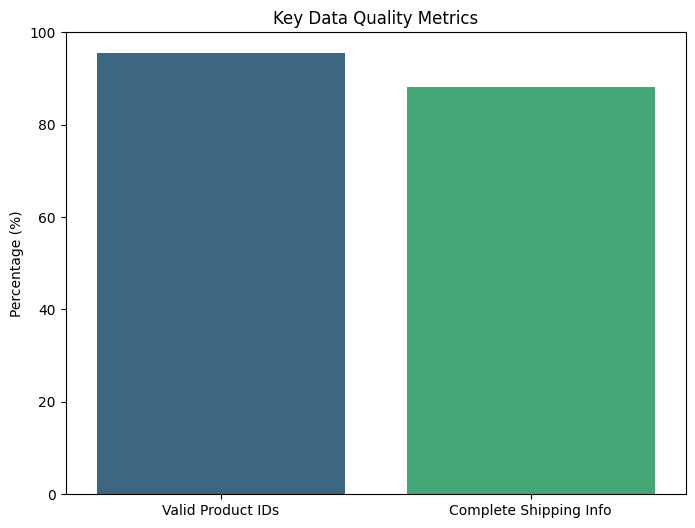

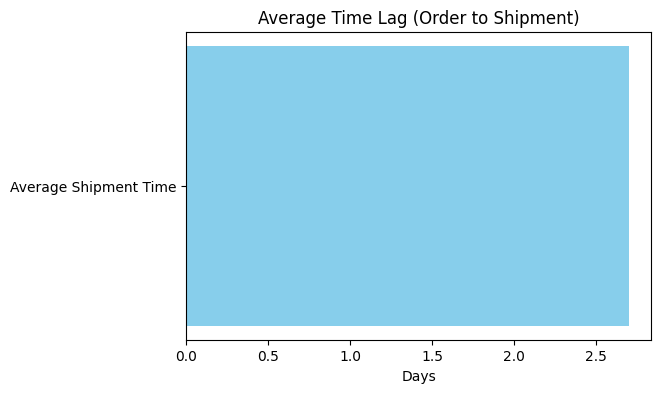


Average Time Lag (Order to Shipment): 2.70 days


In [3]:
# Write your code from here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you have already loaded your sales data into the 'sales_data' DataFrame
# and calculated the KPI values as in the previous example.

# Let's say the calculated KPI values are stored in variables:
percentage_valid_product_ids = 95.5  # Example value
percentage_complete_shipping = 88.2  # Example value
average_time_lag = 2.7  # Example value

# 1. Bar chart for percentages
kpi_names = ['Valid Product IDs', 'Complete Shipping Info']
kpi_values = [percentage_valid_product_ids, percentage_complete_shipping]

plt.figure(figsize=(8, 6))
sns.barplot(x=kpi_names, y=kpi_values, palette="viridis")
plt.ylabel("Percentage (%)")
plt.title("Key Data Quality Metrics")
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.show()

# 2. Single bar or indicator for average time lag
plt.figure(figsize=(6, 4))
plt.barh(['Average Shipment Time'], [average_time_lag], color='skyblue')
plt.xlabel("Days")
plt.title("Average Time Lag (Order to Shipment)")
plt.show()

# Alternatively, a simple text display in a dashboard might be effective for a single value.
print(f"\nAverage Time Lag (Order to Shipment): {average_time_lag:.2f} days")